##### Project Overview:-Analysis of some Reviews on Glassdoor for Grid and vivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\Vikas\Downloads\grid_review.csv',encoding = 'unicode_escape')
print('Dimension of grid review data:-',data.shape)
data.head()

Dimension of grid review data:- (34, 11)


,company,location,dates,job-title,pros,cons,summary,advice-to-mgmt,overall-ratings,helpful-count,link
0,grid,bangalore,"Sep 12,2016",Former Employee - Anonymous Employee,Theres a chance to learn a little bit of basi...,Office is a bit cramped because there are a l...,company review,none,3,11,https://www.glassdoor.co.in/Reviews/Employee-R...
1,grid,bangalore,"Sep 11,2017",Former Employee - Anonymous Employee,"No pros at all, total worst",they charge 55k for 3 months training and afte...,worst company,none,1,1,https://www.glassdoor.co.in/Reviews/Employee-R...
2,grid,bangalore,"Fev 17,2016",Current Employee-anonymous Employee,gud for beginners who are eager to learn techn...,heavy work load and no timings of office,good company,none,3,5,https://www.glassdoor.co.in/Reviews/Employee-R...
3,grid,bangalore,"April 30,2018",Former Employee - Trainee Engineer,i learned so much and got chance to work on v...,Nothing much to tell everything Good for me,good for freshers,everything is fine and good,5,4,https://www.glassdoor.co.in/Reviews/Employee-R...
4,grid,bangalore,"Dec 27,2016",Current Employee-Android developer,Grid is the best place for software developmen...,Working time is not speciafied,good,none,5,3,https://www.glassdoor.co.in/Reviews/Employee-R...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
company            34 non-null object
location           34 non-null object
dates              34 non-null object
job-title          34 non-null object
pros               34 non-null object
cons               34 non-null object
summary            34 non-null object
advice-to-mgmt     34 non-null object
overall-ratings    34 non-null int64
helpful-count      34 non-null int64
link               34 non-null object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB


In [4]:
data.describe()

,overall-ratings,helpful-count
count,34.000000,34.000000
mean,4.058824,7.852941
std,1.347077,8.341689
min,1.000000,1.000000
25%,3.000000,2.250000
50%,5.000000,4.500000
75%,5.000000,10.500000
max,5.000000,38.000000


In [5]:
data.dtypes

company            object
location           object
dates              object
job-title          object
pros               object
cons               object
summary            object
advice-to-mgmt     object
overall-ratings     int64
helpful-count       int64
link               object
dtype: object

### Convertion data types

In [6]:
convert_dtype_list=['overall-ratings','helpful-count']
for var in convert_dtype_list: 
    data[var] = data[var].replace('none' , 0)
    data[var] =  data[var].astype(np.float32)

In [7]:
data.dtypes

company             object
location            object
dates               object
job-title           object
pros                object
cons                object
summary             object
advice-to-mgmt      object
overall-ratings    float32
helpful-count      float32
link                object
dtype: object

### Which company has the most Reviews on Glassdoor?

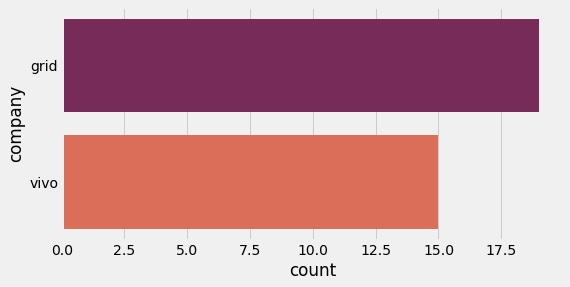

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8,4))
sns.countplot(y ='company',data =data,palette ='rocket',order=data['company'].value_counts().index)
plt.show()

### Top 5 Job Titles of employees who review the most

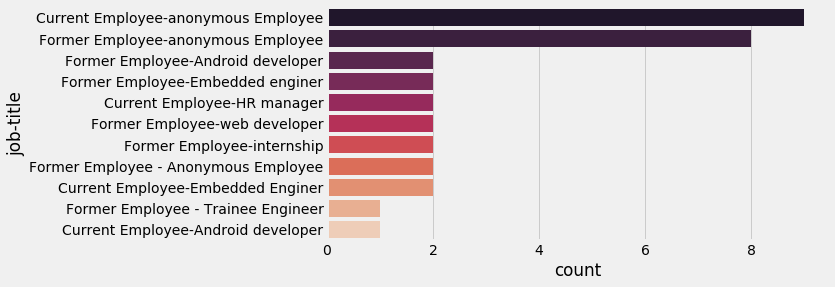

In [9]:
from collections import Counter
common_job_titles = []
c = Counter(data['job-title']).most_common()[:11]
for n in range(11):
    common_job_titles.append(c[n][0])
plt.figure(1 , figsize = (8,4))
sns.countplot(y = 'job-title' , data = data[data['job-title'].isin(common_job_titles)] ,
              palette = 'rocket' , 
              order = data[data['job-title'].isin(common_job_titles)]['job-title'].value_counts().index)
plt.show()

### Top 5 locations user review from on Glassdoor

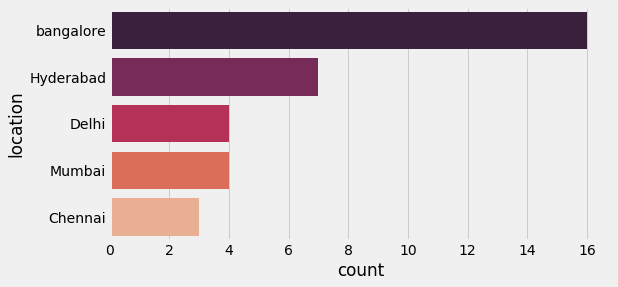

In [10]:
common_location = []
c = Counter(data['location']).most_common()[:5]
for n in range(5):
    common_location.append(c[n][0])
    
plt.figure(1 , figsize = (8,4))
sns.countplot(y = 'location' , data = data[data['location'].isin(common_location)] ,
              palette = 'rocket' , 
              order = data[data['location'].isin(common_location)]['location'].value_counts().index)
plt.title('')
plt.show()

### Overall Rating Distribution

In [11]:
 #display data of overall rating only
data.iloc[:,8:9]

,overall-ratings
0,3.0
1,1.0
2,3.0
3,5.0
4,5.0
5,5.0
6,5.0
7,2.0
8,5.0
9,5.0


In [12]:
data['overall-ratings'].unique()

array([3., 1., 5., 2., 4.])

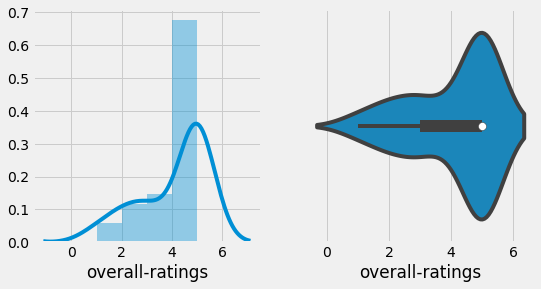

In [13]:
plt.figure(1 ,figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(data['overall-ratings'])

plt.subplot(1,2,2)
sns.violinplot(x = 'overall-ratings' , data = data)

plt.show()

#### Most helpful review on Glassdoor according to the Dataset

In [14]:
print('Job title : {}\nLocation : {}\ndate posted : {}\nCompany : {}'.format(
    data['job-title'][data['helpful-count'] ==  max(data['helpful-count'])].values[0],
    data['location'][data['helpful-count'] ==  max(data['helpful-count'])].values[0],
    data['dates'][data['helpful-count'] ==  max(data['helpful-count'])].values[0],
    data['company'][data['helpful-count'] ==  max(data['helpful-count'])].values[0]))


print('\nReview :\n{}\n\nPros:\n{}\n\nCons:\n{}\n\nAdvice to management:\n{}\n\nHelful Count :{}'.format(
    data['summary'][data['helpful-count'] ==  max(data['helpful-count'])].values[0],
    data['pros'][data['helpful-count'] ==  max(data['helpful-count'])].values[0],
    data['cons'][data['helpful-count'] ==  max(data['helpful-count'])].values[0],
    data['advice-to-mgmt'][data['helpful-count'] ==  max(data['helpful-count'])].values[0],
    data['helpful-count'][data['helpful-count'] ==  max(data['helpful-count'])].values[0]))

print('\n\nRatings:')
print('Overall : {}'.format(data['overall-ratings'][data['helpful-count'] ==  max(data['helpful-count'])].values[0]))


Job title : Former Employee-anonymous Employee
Location : bangalore
date posted : May 18,2017
Company : vivo

Review :
Still the best place to work!

Pros:
it's a great place to work!

Cons:
work life balance is hard to manage

Advice to management:
none

Helful Count :38.0


Ratings:
Overall : 2.0


### Reviews of which company on glassdoor did the users found most useful

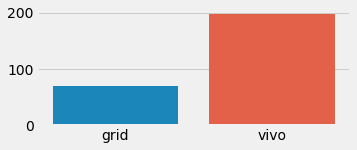

In [15]:
index_companies = ['grid' , 'vivo' , ]
helpful_sum = []
for comp in index_companies:
    helpful_sum.append(np.sum(data['helpful-count'][data['company'] == comp]))
    
plt.figure(1 , figsize = (5,2))
sns.barplot(x = np.arange(2) , y = helpful_sum )
plt.xticks(np.arange(2) , index_companies)
plt.show()

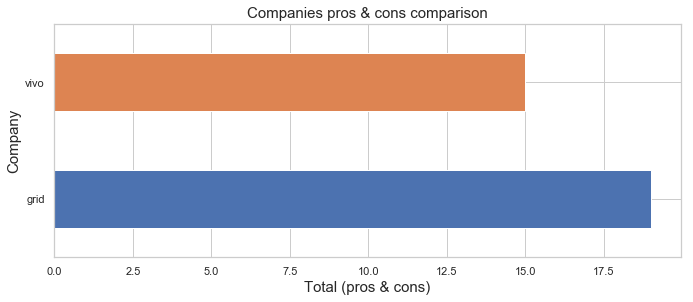

In [16]:
#Comparison of total count of pros/cons company wise
sns.set(context='notebook', style='whitegrid')
plt.figure(figsize =(10,4))
data.groupby(['company']).pros.count().plot('barh')
plt.ylabel('Company', fontsize=15)
plt.xlabel('Total (pros & cons)', fontsize=15)
plt.title('Companies pros & cons comparison', fontsize=15)
plt.show()

### Wordcloud of Summary
A word cloud is a popular visualization of words typically associated with Internet keywords and text data. They are most commonly used to highlight popular or trending terms based on frequency of use and prominence.

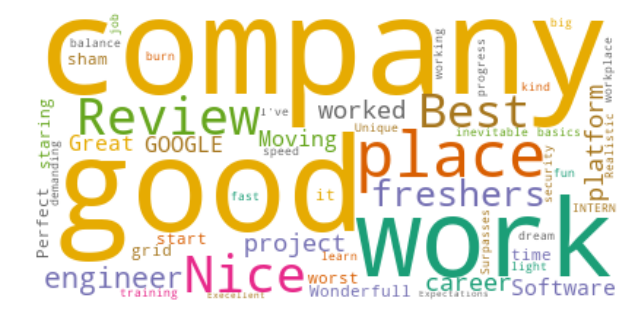

In [17]:
from sklearn.feature_extraction import text
from wordcloud import WordCloud
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS, 
               background_color = "white" , 
               colormap = "Dark2" ,
               max_font_size = 120 , 
               random_state = 42)
corpus = ''
for corp in data['summary'].values:
    corpus = corpus+' '+corp
wc.generate(corpus)
plt.figure(1 , figsize = (10,5))
plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.show()

### Wordcloud of pros

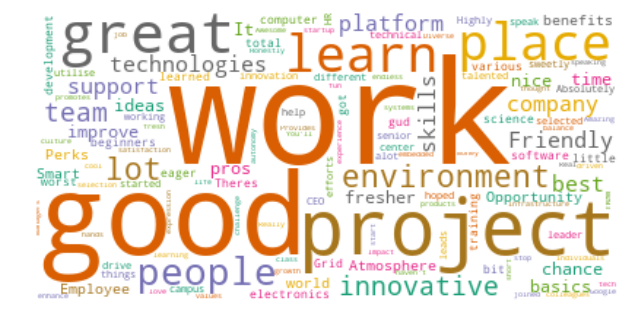

In [18]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS, 
               background_color = "white" , 
               colormap = "Dark2" ,
               max_font_size = 100 , 
               random_state = 22)
corpus = ''
for corp in data['pros'].values:
    corpus = corpus+' '+corp
wc.generate(corpus)
plt.figure(1 , figsize = (10,5))
plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.show()

### Wordcloud of cons

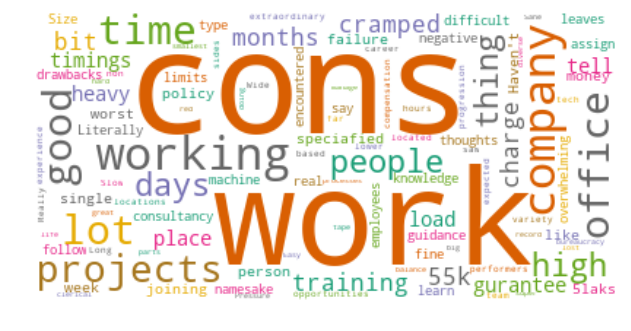

In [19]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS, 
               background_color = "white" , 
               colormap = "Dark2" ,
               max_font_size = 100 , 
               random_state = 22)
corpus = ''
for corp in data['cons'].values:
    corpus = corpus+' '+corp
wc.generate(corpus)
plt.figure(1 , figsize = (10,5))
plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.show()

### Wordcloud of advice to management

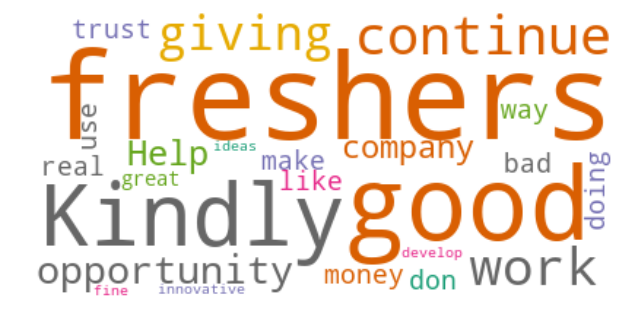

In [20]:
wc = WordCloud(stopwords = text.ENGLISH_STOP_WORDS, 
               background_color = "white" , 
               colormap = "Dark2" ,
               max_font_size = 100 , 
               random_state = 22)
corpus = ''
for corp in data['advice-to-mgmt'].values:
    corpus = corpus+' '+corp
wc.generate(corpus)
plt.figure(1 , figsize = (10,5))
plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
#Comprehension list
data["Liked"] = [1 if i > 2.5 else 0 for i in data['overall-ratings']]

In [22]:
data['Liked']

0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     1
9     1
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    0
27    1
28    0
29    1
30    1
31    1
32    0
33    1
Name: Liked, dtype: int64

In [23]:
data = data[['pros','Liked']]
data

,pros,Liked
0,Theres a chance to learn a little bit of basi...,1
1,"No pros at all, total worst",0
2,gud for beginners who are eager to learn techn...,1
3,i learned so much and got chance to work on v...,1
4,Grid is the best place for software developmen...,1
5,lots of innovative projects to work in differe...,1
6,Company works more on innovative projects in i...,1
7,good platform for innovative projects work,0
8,I was selected in campus drive and i started w...,1
9,Friendly environment. Lot of innovation. Good ...,1


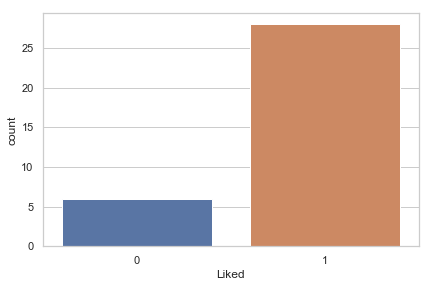

In [24]:
sns.countplot(x = data['Liked'],data = data)

This plot shows that there are more satisfied employee are there than unsatisfied employee

### Regular Expression
Removing alphanumeric, spelling and punctuation characters

In [25]:
import re
com = re.sub('[^a-zA-Z]', ' ', data['pros'][1])
com

'No pros at all  total worst'

In [26]:
# Conversion all letters to lower case 
com = com.lower()
com

'no pros at all  total worst'

In [27]:
# Splitting word by word 
com = com.split()
com

['no', 'pros', 'at', 'all', 'total', 'worst']

### Cleaning the stopwords

In [28]:
# Loading stopwords

import nltk
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')
print(stopwords_en)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [30]:
# Cleaning the stop words
# In here, we use set function because set is unordered and same element within set passes only one time.
com = [ps.stem(word) for word in com if not word in set(stopwords.words('english'))]
com

['pro', 'total', 'worst']

In [31]:
#Combining Process
com = ' '.join(com)
com

'pro total worst'

### Making Loop

In [32]:
result = []
for i in range(34):
    com = re.sub('[^a-zA-Z]', ' ', data['pros'][i])
    com = com.lower()
    com = com.split()
    com = [ps.stem(word) for word in com if not word in set(stopwords.words('english'))]
    com = ' '.join(com)
    result.append(com)

In [33]:
result

['there chanc learn littl bit basic comput scienc electron work project',
 'pro total worst',
 'gud beginn eager learn technolog',
 'learn much got chanc work variou project',
 'grid best place softwar develop train',
 'lot innov project work differ technolog',
 'compani work innov project r center highli talent team lead',
 'good platform innov project work',
 'select campu drive start work n hope team leader would help alot improv technic skill',
 'friendli environ lot innov good support senior employe',
 'absolut pro ceo hr speak sweetli utilis effort',
 'good place learn new thing work project innov idea colleagu friendli nice environ',
 'great compani fresher learn lot technolog short time',
 'good place start fresher lot learn improv skill',
 'honestli speak good place hand project experi',
 'friendli environ good platform learn basic embed system',
 'opportun work real time project',
 'good work cultur employe satisfact',
 'alway valu peopl provid great platform enhanc skill wor

#### Feature Extraction (Bag of Words (BOW))

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

### We take most used 2000 words 
cv = CountVectorizer(max_features=2000)

X = cv.fit_transform(result).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
y = data.iloc[:,1].values
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

### Machine Learning Part

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 1],
       [0, 6]], dtype=int64)